In [1]:
%run InitAndFuctions.ipynb

Host: 077e8eb4f4f6
3.6.8 (default, Nov 16 2020, 16:55:22) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)] <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f0219279668>
Welcome to JupyROOT 6.22/06


# analisi

In [2]:
file_out=mybasepath+"out/cosmics_run4035_cmin_0_cmax_10_rescale_576_nsigma_0.5_ev_100_ped_4034.plk.gz"
file_out=mybasepath+"out/cosmics_run4039_cmin_0_cmax_10_rescale_576_nsigma_0.5_ev_200_ped_4038_ms_2_rt_2_vL.1.plk.gz"
df = pd.read_pickle(file_out, compression='gzip')

df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.


In [3]:
df

,iTr,cluster_lable,pixels,photons,ph_pixels,x0start,y0start,x0end,y0end,length,mse,r2,x0c,y0c
0,0.0,0.0,9056.0,35454.395,3.915017,604.0,148.0,2140.0,1636.0,2138.560263,2.261338,0.999601,1372.0,892.0
1,0.0,1.0,7024.0,26910.685,3.831248,1288.0,164.0,1448.0,2108.0,1950.573249,0.749120,0.988709,1368.0,1136.0
2,0.0,2.0,9856.0,33003.460,3.348565,248.0,168.0,2144.0,2144.0,2738.501780,1.928375,0.999759,1196.0,1156.0
3,0.0,3.0,7056.0,22787.860,3.229572,2052.0,168.0,1812.0,2108.0,1954.788991,0.809772,0.995923,1932.0,1138.0
4,0.0,4.0,4736.0,16594.940,3.503999,148.0,560.0,2124.0,972.0,2018.494488,32.610653,0.998463,1136.0,766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,199.0,15.0,3904.0,12753.740,3.266839,2076.0,188.0,1032.0,2072.0,2153.924790,1.384505,0.999626,1554.0,1130.0
3996,199.0,16.0,3488.0,11231.480,3.220034,156.0,192.0,2148.0,868.0,2103.577904,12.759514,0.999468,1152.0,530.0
3997,199.0,17.0,3456.0,13386.940,3.873536,2068.0,616.0,152.0,1004.0,1954.891301,31.661443,0.997380,1110.0,810.0
3998,199.0,18.0,3056.0,9626.265,3.149956,2152.0,1572.0,148.0,2076.0,2066.405575,25.133445,0.998733,1150.0,1824.0


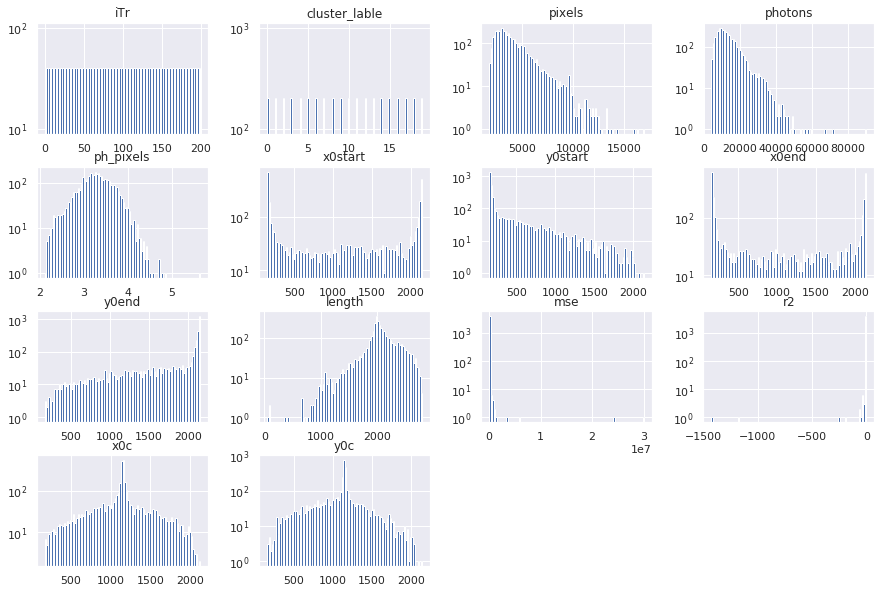

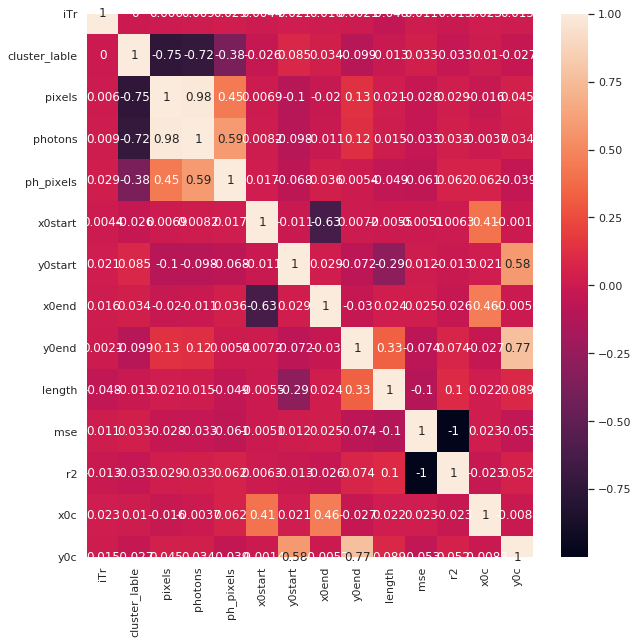

In [4]:
import seaborn as sns
sns.set()
#
# Visulizza tutte le Varibili
#
df.hist(bins=100, figsize=(15,10), log=True)
plt.show()

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
def his_plot(what, ax=ax, bins=100, xmin=False, xmax=False):
    if not xmin: xmin = what.min()
    if not xmax: xmax = what.ma()
        
    y = data[(data > xmin) & (data < xmax)]
    binsf = int(bins*((xmax-xmin)/(y.max()-y.min())))
    x=np.linspace(xmin , xmax, binsf)
    yh, _ = np.histogram(y, bins=binsf, range=(xmin,xmax))

NameError: name 'ax' is not defined

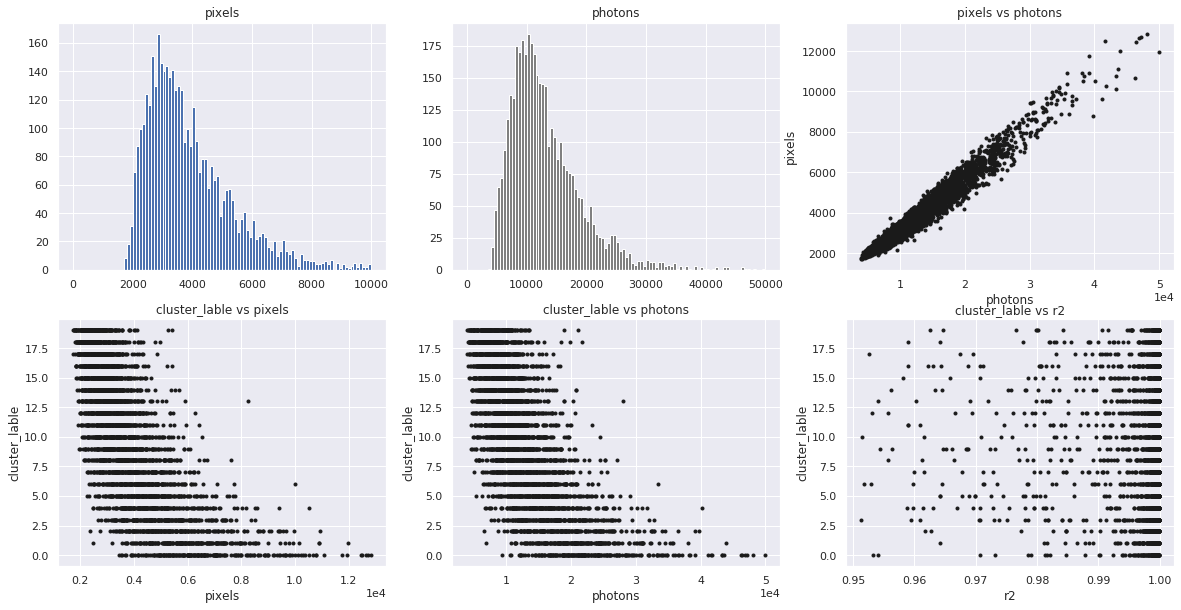

In [77]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax[0, 0].set_title('pixels')
E, M, S = df.pixels.len(), df.pixels.mean(), 
ax[0, 0].hist(df.pixels, 100, range=(0,10000))
#histGaus(df.pixels, 100, ax[0, 0], color='b', xrange=(1000,10000), alpha=1, label='')
ax[0, 1].set_title('photons')
phmax=50000
ax[0, 1].hist(df.photons, 100, range=(0,phmax), color="gray")
ax[0, 2].set_title('pixels vs photons')
ax[0, 2].plot(df.photons[df.photons<phmax].values, df.pixels[df.photons<phmax].values, 'k.')
ax[0, 2].set_xlabel('photons')
ax[0, 2].set_ylabel('pixels')
ax[0, 2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 0].set_title('cluster_lable vs pixels')
ax[1, 0].plot(df.pixels[df.photons<phmax].values, df.cluster_lable[df.photons<phmax].values, 'k.')
ax[1, 0].set_xlabel('pixels')
ax[1, 0].set_ylabel('cluster_lable')
ax[1, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 1].set_title('cluster_lable vs photons')
ax[1, 1].plot(df.photons[df.photons<phmax].values, df.cluster_lable[df.photons<phmax].values, 'k.')
ax[1, 1].set_xlabel('photons')
ax[1, 1].set_ylabel('cluster_lable')
ax[1, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 2].set_title('cluster_lable vs r2')
ax[1, 2].plot(df.r2[df.r2>0.95].values, df.cluster_lable[df.r2>0.95].values, 'k.')
ax[1, 2].set_xlabel('r2')
ax[1, 2].set_ylabel('cluster_lable')
ax[1, 2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
plt.show()

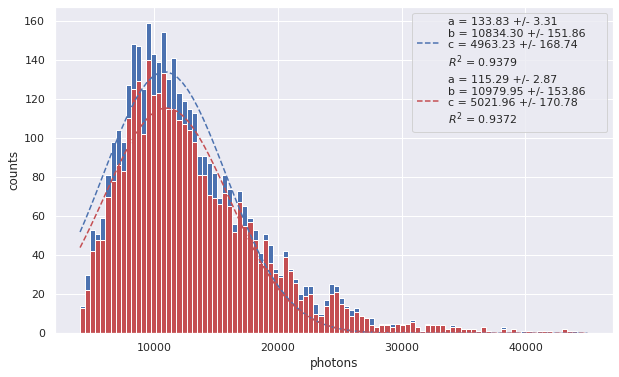

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.photons, 100, ax, color='b', xrange=(4000,45000), alpha=1, label='')
histGaus(df.photons[df.r2>0.99], 100, ax, color='r', xrange=(4000,45000), alpha=1, label='')
plt.xlabel('photons')
plt.ylabel('counts')
plt.legend()
plt.show()

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


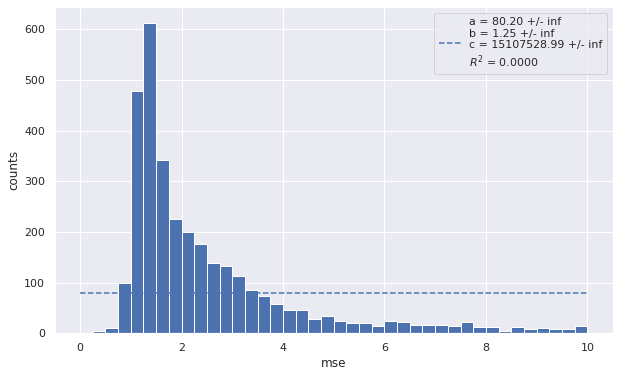

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.mse, 40, ax, color='b', xrange=(0.,10), alpha=1, label='')
plt.xlabel('mse')
plt.ylabel('counts')
plt.legend()
plt.show()

In [51]:
len(df.mse[df.mse<1])

113

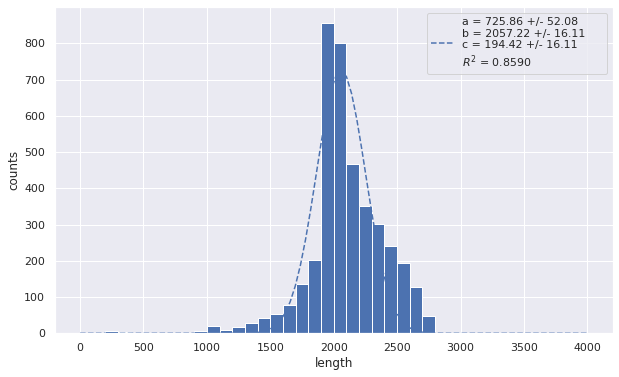

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.length, 40, ax, color='b', xrange=(0,4000), alpha=1, label='')
plt.xlabel('length')
plt.ylabel('counts')
plt.legend()
plt.show()

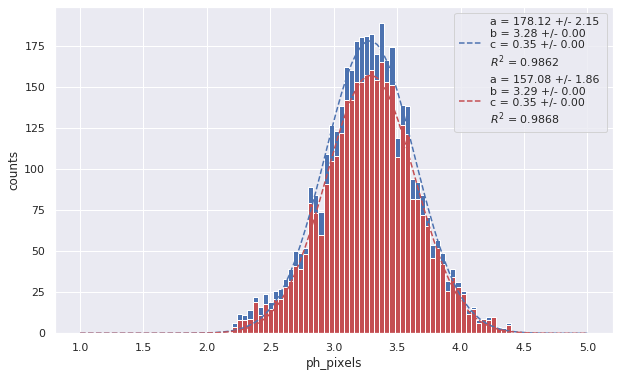

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.ph_pixels, 100, ax, color='b', xrange=(1,5), alpha=1, label='')
histGaus(df.ph_pixels[df.r2>0.99], 100, ax, color='r', xrange=(1,5), alpha=1, label='')
plt.xlabel('ph_pixels')
plt.ylabel('counts')
plt.legend()
plt.show()

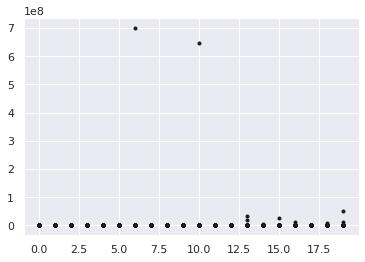

In [54]:
plt.plot(df.cluster_lable.values, df.mse.values, 'k.')
plt.show()

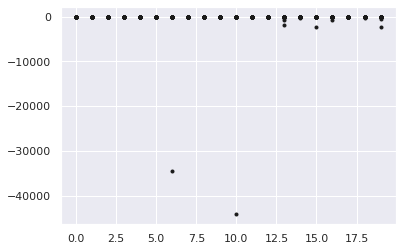

In [55]:
plt.plot(df.cluster_lable.values, df.r2.values, 'k.')
plt.show()

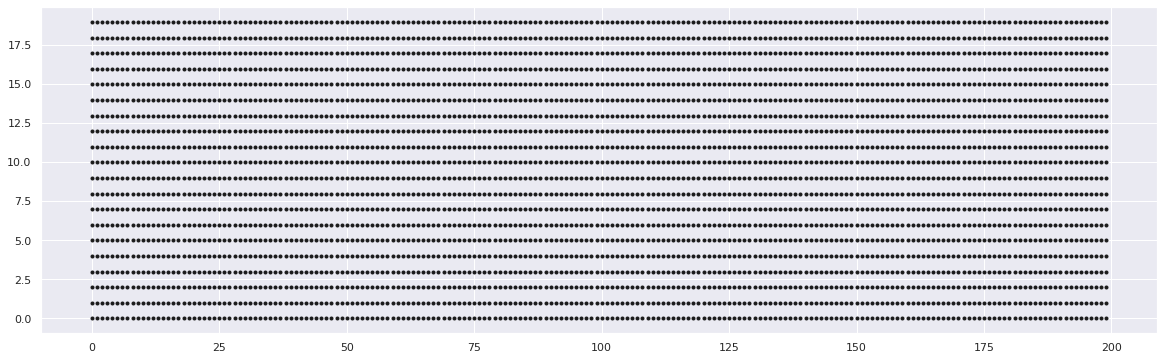

In [56]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df.iTr.values, df.cluster_lable.values, 'k.')
plt.show()

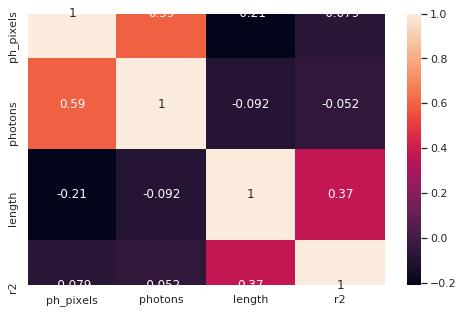

,ph_pixels,photons,length,r2
ph_pixels,1.000000,0.594219,-0.212243,-0.079013
photons,0.594219,1.000000,-0.092116,-0.052252
length,-0.212243,-0.092116,1.000000,0.366503
r2,-0.079013,-0.052252,0.366503,1.000000


In [57]:
import seaborn as sns
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
features = df[['ph_pixels', 'photons', 'length', 'r2']][(df.r2>0.99)].copy()
plt.figure(figsize = (8,5))
sns.heatmap(features.corr(), annot=True)
plt.show()

features.corr()

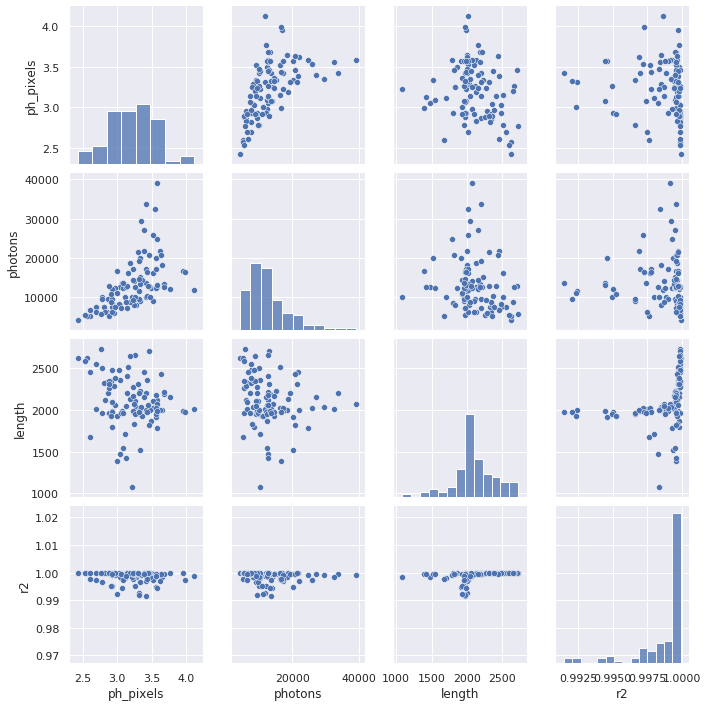

In [58]:
sns.pairplot(features.sample(100))
plt.show()

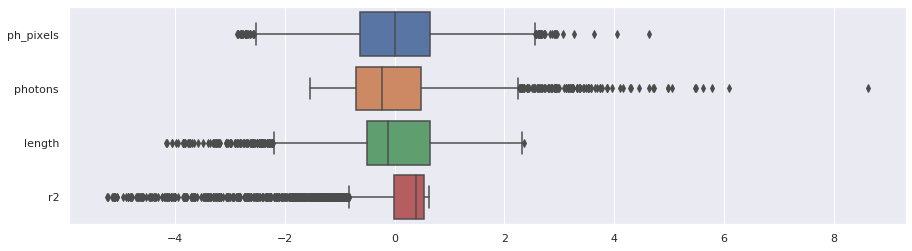

,ph_pixels,photons,length,r2
count,3.473000e+03,3.473000e+03,3.473000e+03,3.473000e+03
mean,-5.319352e-17,-1.248002e-16,1.093536e-15,4.676529e-14
std,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00
min,-2.861285e+00,-1.534068e+00,-4.165109e+00,-5.241183e+00
25%,-6.316839e-01,-7.013363e-01,-4.952151e-01,-1.643793e-02
50%,1.020055e-02,-2.199936e-01,-1.111044e-01,3.983581e-01
75%,6.433747e-01,4.848218e-01,6.450751e-01,5.270473e-01
max,4.630984e+00,8.609623e+00,2.355632e+00,6.219322e-01


In [59]:
# normalizzazione delle variabili

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(features)
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
scaled_dataframe = pd.DataFrame( scaled_array, columns = features.columns ) # df.colums per tutte e colonne
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()
scaled_dataframe.describe()

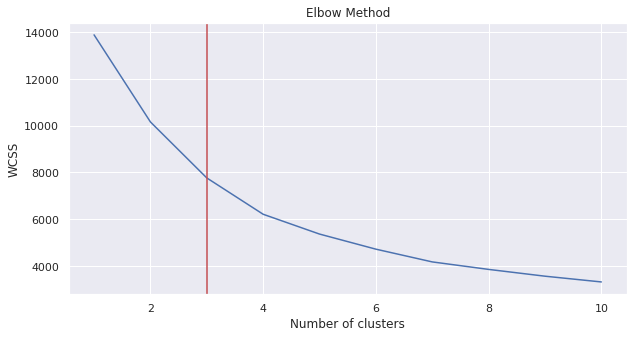

In [60]:
from sklearn.cluster import KMeans
plt.figure(figsize = (10,5))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_dataframe)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.axvline(3, color = "r")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
from sklearn import metrics
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = []

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(scaled_dataframe)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_dataframe, labels_k)
    silhouette_scores.append(score_k)
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.2554
Tested kMeans with k = 3	SS: 0.2930
Tested kMeans with k = 4	SS: 0.2692
Tested kMeans with k = 5	SS: 0.2541
Tested kMeans with k = 6	SS: 0.2632
Tested kMeans with k = 7	SS: 0.2747
Tested kMeans with k = 8	SS: 0.2735
Tested kMeans with k = 9	SS: 0.2549
Tested kMeans with k = 10	SS: 0.2573
Tested kMeans with k = 11	SS: 0.2601
Tested kMeans with k = 12	SS: 0.2612
Tested kMeans with k = 13	SS: 0.2517
Tested kMeans with k = 14	SS: 0.2501
Tested kMeans with k = 15	SS: 0.2464
Tested kMeans with k = 16	SS: 0.2392
Tested kMeans with k = 17	SS: 0.2412
Tested kMeans with k = 18	SS: 0.2419
Tested kMeans with k = 19	SS: 0.2430
Tested kMeans with k = 20	SS: 0.2405
Tested kMeans with k = 21	SS: 0.2424
Tested kMeans with k = 22	SS: 0.2404
Tested kMeans with k = 23	SS: 0.2315
Tested kMeans with k = 24	SS: 0.2272
Done!


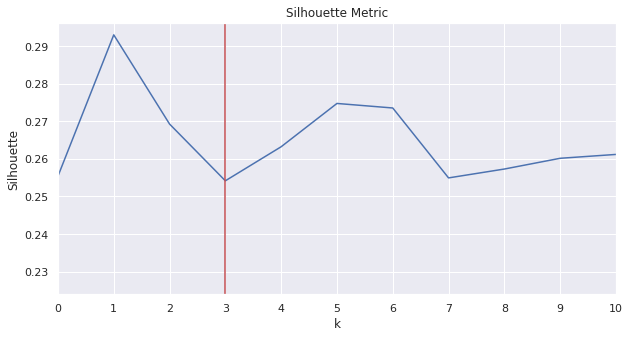

In [62]:
plt.figure(figsize = (10,5))
plt.plot(np.array(silhouette_scores))
plt.xticks(range(0,23,1))
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(3, color = "r")
plt.xlim(0,10)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_dataframe)
features['cluster'] = kmeans.labels_

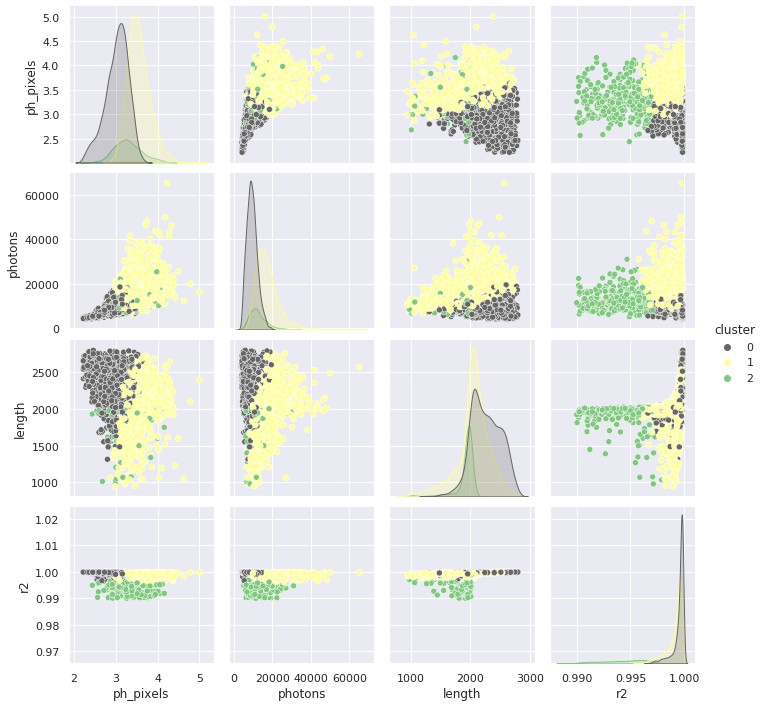

In [64]:
sns.pairplot(data = features, hue = "cluster", palette = "Accent_r")
plt.show()

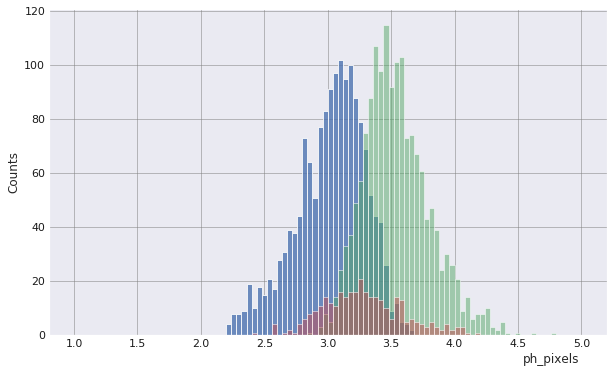

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.ph_pixels[features.cluster==0], bins=100, color='b', alpha=0.8, range=(1, 5))
plt.hist(features.ph_pixels[features.cluster==1], bins=100, color='g', alpha=0.5, range=(1, 5))
plt.hist(features.ph_pixels[features.cluster==2], bins=100, color='r', alpha=0.5, range=(1, 5))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('ph_pixels', x=0.9)
plt.ylabel('Counts')
plt.show()

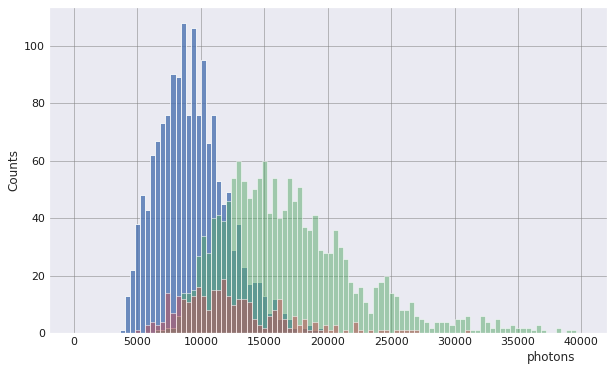

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.photons[features.cluster==0], bins=100, color='b', alpha=0.8, range=(0, 40000))
plt.hist(features.photons[features.cluster==1], bins=100, color='g', alpha=0.5, range=(0, 40000))
plt.hist(features.photons[features.cluster==2], bins=100, color='r', alpha=0.5, range=(0, 40000))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('photons', x=0.9)
plt.ylabel('Counts')
plt.show()

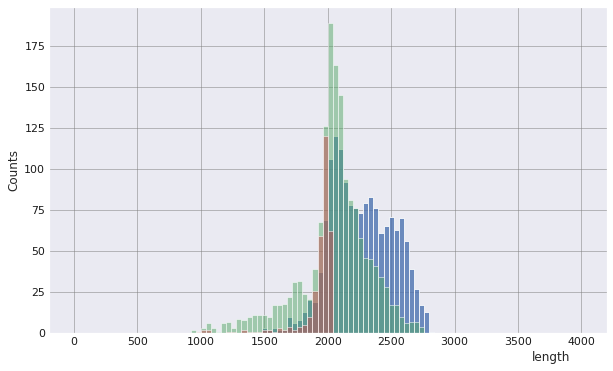

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.length[features.cluster==0], bins=100, color='b', alpha=0.8, range=(0, 4000))
plt.hist(features.length[features.cluster==1], bins=100, color='g', alpha=0.5, range=(0, 4000))
plt.hist(features.length[features.cluster==2], bins=100, color='r', alpha=0.5, range=(0, 4000))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('length', x=0.9)
plt.ylabel('Counts')
plt.show()

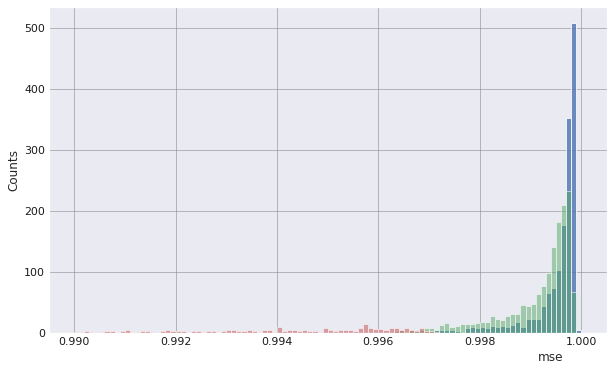

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.r2[features.cluster==0], bins=100, color='b', alpha=0.8, range=(0.99, 1))
plt.hist(features.r2[features.cluster==1], bins=100, color='g', alpha=0.5, range=(0.99, 1))
plt.hist(features.r2[features.cluster==2], bins=100, color='r', alpha=0.5, range=(0.99, 1))
#plt.yscale('Log')00
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('mse', x=0.9)
plt.ylabel('Counts')
plt.show()